# Project Data Curation
This notebook contains information on how to access the 4 data files provided for the final project, and the variables contained in each.

In [1]:
%matplotlib inline
from scipy import io
import numpy as np
import matplotlib.pyplot as plt

# Rat Free-Behavior LFP & Spike
Recorded from medial prefrontal cortex (mPFC). LFP sampled at 1250Hz, 2 channels. From **Watson et al., Neuron, 2016.**

In this experiment, the rat is freely behaving. I've cut out two 5-minute segments of interest, one during waking and one during sleeping. The relevant variables are displayed below. Of particular note:
- the LFP timestamps do not start at 0s. `t_wake` is between 600-900s, and `t_sleep` is between 3600-3900s. They are 5 minute chunks of data cut out from the total recording.
- the spike timestamps `cells_wake` and `cells_sleep` were also cut from the full data, falling only between the two aforementioned time ranges. This means you cannot directly multiply by fs to get the corresponding LFP index, as there is a time offset. You can easily get around this by subtracting the start time (600s and 3600s) from all the timestamps.
- `cell_info` has information on the single units. There are as many rows as there are cells (113), and the first column corresponds to which electrode the cell was recorded on, in case you want to merge cells on the same electrode. The second column denotes whether the cell is excitatory (1) or inhibitory (-1), which you may wish to analyze separately.


In [2]:
rat_lfp_data = io.loadmat('LFP_rat/LFP_rat.mat', squeeze_me = True)
print(rat_lfp_data.keys())

# sampling rate
print(rat_lfp_data['fs'])

# LFP during waking
print('---LFP data---')
print(rat_lfp_data['t_sleep'])
print(rat_lfp_data['lfp_wake'].shape)

# spikes during waking
print('---Single Unit Data---')
print(rat_lfp_data['cells_wake'].shape) # number of cells
print(rat_lfp_data['cells_wake'][0]) # spike timestamps from one cell during wake

# information on the cell
# first column is the electrode it was recorded on
# second column is excitatory (1) or inhibitory (-1) cell
rat_lfp_data['cell_info'][:10,:] # print the first 10 cells

dict_keys(['__header__', '__version__', '__globals__', 'cells_wake', 'cells_sleep', 'lfp_wake', 'lfp_sleep', 't_wake', 't_sleep', 'cell_info', 'fs'])
1250
---LFP data---
[3600.     3600.0008 3600.0016 ... 3899.9976 3899.9984 3899.9992]
(2, 375000)
---Single Unit Data---
(113,)
[600.1829  600.6995  604.3232  604.50225 605.13325 605.8541  606.4844
 607.5782  608.14575 609.87655 611.53045 613.8574  616.3799  616.50595
 620.30875 621.13665 622.556   623.00505 623.2529  623.90085 623.9376
 623.9989  628.1414  629.00245 629.09465 632.6168  633.505   633.7205
 634.45795 635.93235 636.038   636.1238  638.7493  638.82615 641.3165
 641.907   642.31595 644.38115 644.48415 645.74425 646.13145 646.1723
 647.9316  648.05565 648.4733  649.2729  649.94175 653.27285 653.9618
 661.4622  661.73325 661.9552  662.65715 663.1341  665.40565 665.89685
 671.7411  676.80845 678.28325 678.46495 679.2043  680.50305 688.6477
 688.7401  690.2802  690.43455 691.48115 691.88635 692.441   692.8534
 693.40105 695.37465

array([[ 2,  1],
       [ 2,  1],
       [ 2,  1],
       [ 2,  1],
       [ 2, -1],
       [ 2,  1],
       [ 2,  1],
       [ 2,  1],
       [ 2,  1],
       [ 2,  1]], dtype=int32)

Text(0.5,0,'Time (s)')

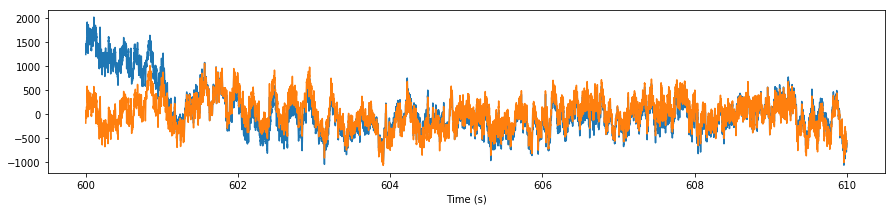

In [4]:
plt.figure(figsize=(15,3))
plt.plot(rat_lfp_data['t_wake'][:rat_lfp_data['fs']*10],rat_lfp_data['lfp_wake'][:,:rat_lfp_data['fs']*10].T)
plt.xlabel('Time (s)')

# Monkey Resting ECoG Data
Recorded from monkey whole cortex. ECoG sampled at 1000Hz, 3 channels. From **Yanagawa et al., PLOS ONE, 2013.**

In this experiment, the monkey is sitting in a chair with no task demands. 5 minutes of data each are provided during 3 different stages: awake eyes open, awake eyes closed, and anesthesized. They are stored in `ecog_eyesopen`,`ecog_eyesclosed`, and `ecog_anes` respectively. The sampling rate is provided, from which you can compute the time vectors (they can have their own time vectors all starting from 0s).

`labels` contains information about which brain regions the 3 channels are located in, while `elec_num` has the electrode number, which you can find on the brain map image included in the same folder (brainmap.jpg).

dict_keys(['__header__', '__version__', '__globals__', 'ecog_anes', 'ecog_eyesclosed', 'ecog_eyesopen', 'elec_num', 'fs', 'labels'])
1000
(3, 300000)
['cingulate' 'occipital' 'temporal']
[52 70 91]


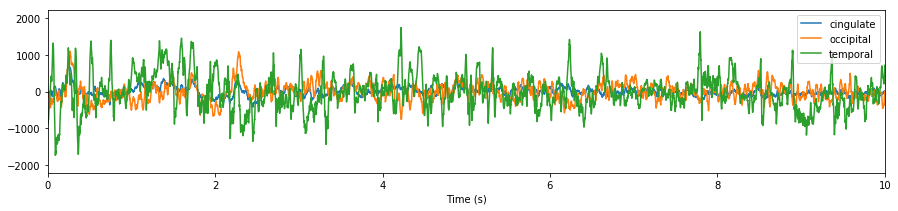

In [7]:
monkey_ecog_data = io.loadmat('ECoG_monkey/ECoG_monkey.mat', squeeze_me = True)
print(monkey_ecog_data.keys())
print(monkey_ecog_data['fs'])
print(monkey_ecog_data['ecog_eyesopen'].shape)
print(monkey_ecog_data['labels'])
print(monkey_ecog_data['elec_num'])

plt.figure(figsize=(15,3))
plt.plot(np.arange(0,monkey_ecog_data['ecog_eyesopen'].shape[1]/monkey_ecog_data['fs'],1/monkey_ecog_data['fs']), 
         monkey_ecog_data['ecog_eyesopen'].T)
plt.xlim([0,10])
plt.xlabel('Time (s)')
plt.legend(monkey_ecog_data['labels'])

# Human Task ECoG Data
Recorded from human sensorimotor region. ECoG sampled at 1000Hz, 3 channels. From **Miller et al., JNeuro, 2007.**

In this experiment, the patient is doing a simple cued motor task. A cue comes on the screen indicating which of the 5 fingers to move, and usually after a small delay, finger movement begins. ECoG data is stored in `ecog_task`, and note that the data is transposed, and has dimension of [time x channel]. `scale` stores the integer-to-microvolt conversion, you may use it if you want your results to be in physical units. `labels` contains the region where the electrode came from: the first two channels from dorsal primary motor cortex, and the third from dorsal primary sensory cortex.

The task information is as follows:
- `cue` is a [time x 1] vector that has information on which cue was presented (1-5 for the fingers, 0 for rest)
- `flex` is a [time x 5] matrix that contains finger movement data, one for each finger. These look like continuous values, and measures the actual flexion of the fingers. You can see that they are slightly delayed from the cue onset.
- `stim` is a [time x 1] vector that is the post-processed finger movement data, interpretted from `flex`. A value of 1-5 indicate which finger was moved, and 0 is rest. You can just use this vector (and ignore `stim`) to epoch your trials.

dict_keys(['__header__', '__version__', '__globals__', 'cue', 'ecog_task', 'flex', 'fs', 'labels', 'scale', 'stim'])
1000
(610040, 3)
(610040,)
(610040,)
(610040, 5)
['dorsal M1' 'dorsal M1' 'dorsal S1']
0.0298


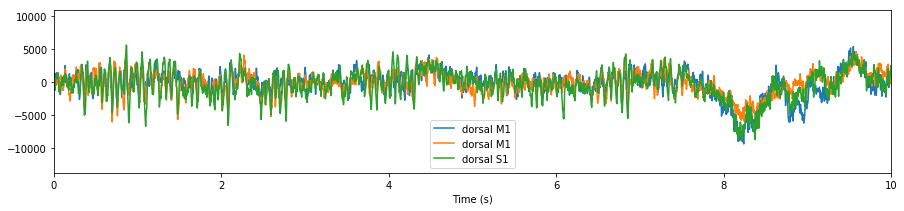

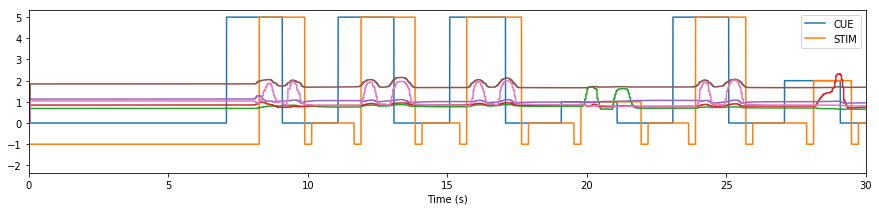

In [8]:
human_ecog_data = io.loadmat('ECoG_human/ECoG_human.mat', squeeze_me = True)
print(human_ecog_data.keys())
print(human_ecog_data['fs'])
print(human_ecog_data['ecog_task'].shape)
print(human_ecog_data['cue'].shape)
print(human_ecog_data['stim'].shape)
print(human_ecog_data['flex'].shape)
print(human_ecog_data['labels'])
print(human_ecog_data['scale'])

plt.figure(figsize=(15,3))
plt.plot(np.arange(0,human_ecog_data['ecog_task'].shape[0]/human_ecog_data['fs'],1/human_ecog_data['fs']), 
         human_ecog_data['ecog_task'])
plt.legend(human_ecog_data['labels'])
plt.xlim([0,10])
plt.xlabel('Time (s)')

plt.figure(figsize=(15,3))
plt.plot(np.arange(0,human_ecog_data['ecog_task'].shape[0]/human_ecog_data['fs'],1/human_ecog_data['fs']), 
         human_ecog_data['cue'], label='CUE')
plt.plot(np.arange(0,human_ecog_data['ecog_task'].shape[0]/human_ecog_data['fs'],1/human_ecog_data['fs']), 
         human_ecog_data['stim'], label='STIM')
plt.plot(np.arange(0,human_ecog_data['ecog_task'].shape[0]/human_ecog_data['fs'],1/human_ecog_data['fs']), 
         human_ecog_data['flex']/1000)

plt.xlim([0,30])
plt.xlabel('Time (s)')
plt.legend()

# Human EEG dataset
A Dataset of Scalp EEG Recordings of Alzheimer’s Disease, Frontotemporal Dementia and Healthy Subjects from Routine EEG **from Miltiadous et al 2023.**

This dataset provides resting-state EEG recordings from individuals with Alzheimer’s disease (AD), frontotemporal dementia (FTD), and healthy controls, collected using a clinical EEG system with 19 scalp electrodes during an eyes-closed resting state. The dataset includes 36 AD patients, 23 FTD patients, and 29 healthy age-matched subjects, with Mini-Mental State Examination (MMSE) scores reported for each. EEG signals were recorded using a monopolar montage, and both raw and preprocessed EEG data are available in BIDS format. Preprocessing involved artifact subspace reconstruction and independent component analysis for denoising. This dataset has high reuse potential for studying EEG-based biomarkers for dementia, brain connectivity alterations, and machine learning applications in neurodegenerative disease diagnosis.
- Two individual EEG data included(Alzheimer’s disease - subject_001, Healthy Control - subject_027)
-  The sampling rate was 500 Hz and the resolution was 10 uV/mm
- Three channel included: Fp1','Fp2','F3'

In [22]:
Control = np.load("EEG_human/Control_EEG_sub_037.npy")
AD = np.load("EEG_human/AD_EEG_sub_001.npy")

In [12]:
processed_Control = np.load("EEG_human/Control_EEG_sub_037_processed.npy")
processed_AD = np.load("EEG_human/AD_EEG_sub_001_processed.npy")

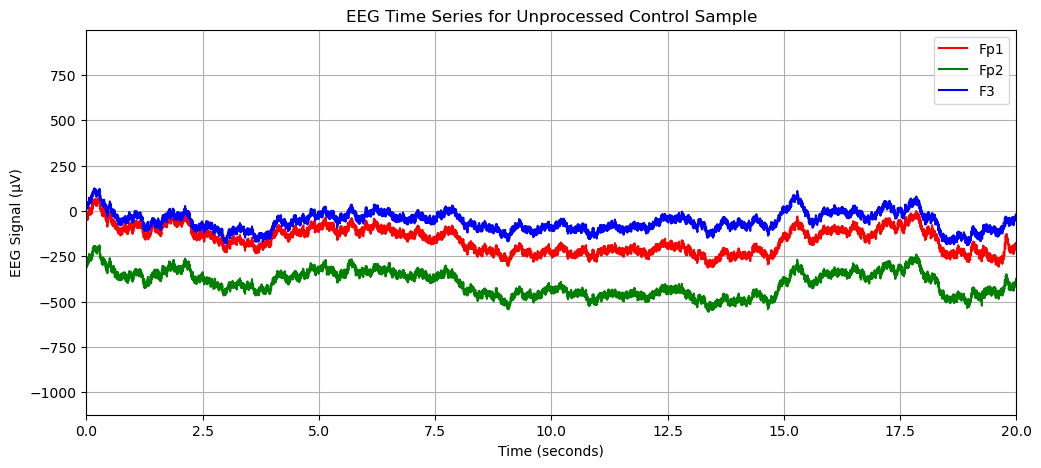

In [23]:
fs = 500  # Sampling rate (Hz)
num_samples = Control.shape[1]  # 10000 samples

time = np.linspace(0, num_samples / fs, num_samples)

channels = ['Fp1', 'Fp2', 'F3']
colors = ['r', 'g', 'b']  # Red, Green, Blue

plt.figure(figsize=(12, 5))
for i in range(3):
    plt.plot(time, Control[i, :], label=channels[i], color=colors[i])

# Formatting
plt.xlim(0,20)
plt.xlabel("Time (seconds)")
plt.ylabel("EEG Signal (µV)")
plt.title("EEG Time Series for Unprocessed Control Sample")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

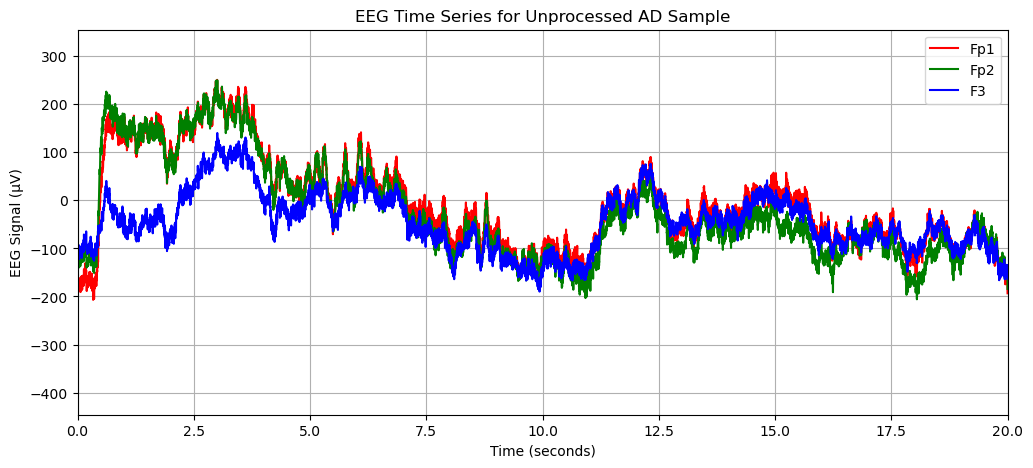

In [24]:
fs = 500  # Sampling rate (Hz)
num_samples = AD.shape[1]  # 10000 samples

time = np.linspace(0, num_samples / fs, num_samples)

channels = ['Fp1', 'Fp2', 'F3']
colors = ['r', 'g', 'b']  # Red, Green, Blue

plt.figure(figsize=(12, 5))
for i in range(3):
    plt.plot(time, AD[i, :], label=channels[i], color=colors[i])

# Formatting
plt.xlim(0,20)
plt.xlabel("Time (seconds)")
plt.ylabel("EEG Signal (µV)")
plt.title("EEG Time Series for Unprocessed AD Sample")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

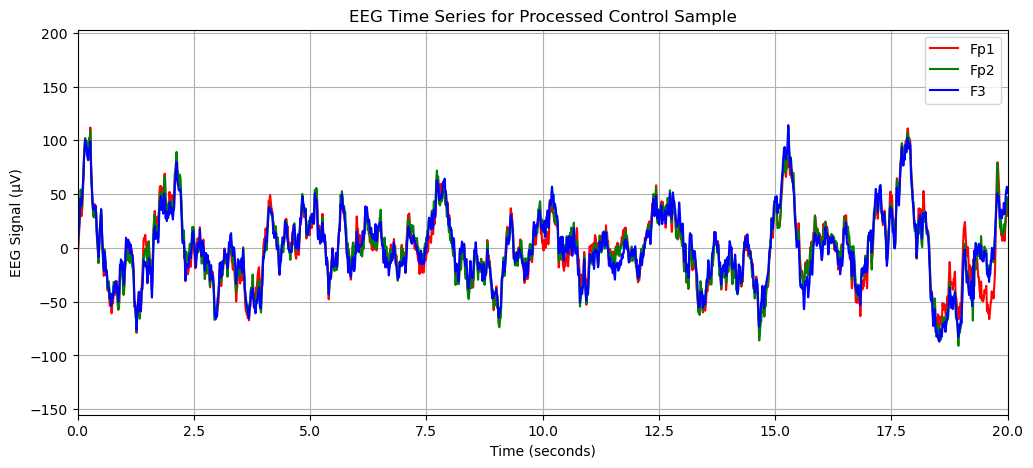

In [18]:
fs = 500  # Sampling rate (Hz)
num_samples = processed_Control.shape[1]  # 10000 samples

time = np.linspace(0, num_samples / fs, num_samples)

channels = ['Fp1', 'Fp2', 'F3']
colors = ['r', 'g', 'b']  # Red, Green, Blue

plt.figure(figsize=(12, 5))
for i in range(3):
    plt.plot(time, processed_Control[i, :], label=channels[i], color=colors[i])

# Formatting
plt.xlim(0,20)
plt.xlabel("Time (seconds)")
plt.ylabel("EEG Signal (µV)")
plt.title("EEG Time Series for Processed Control Sample")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

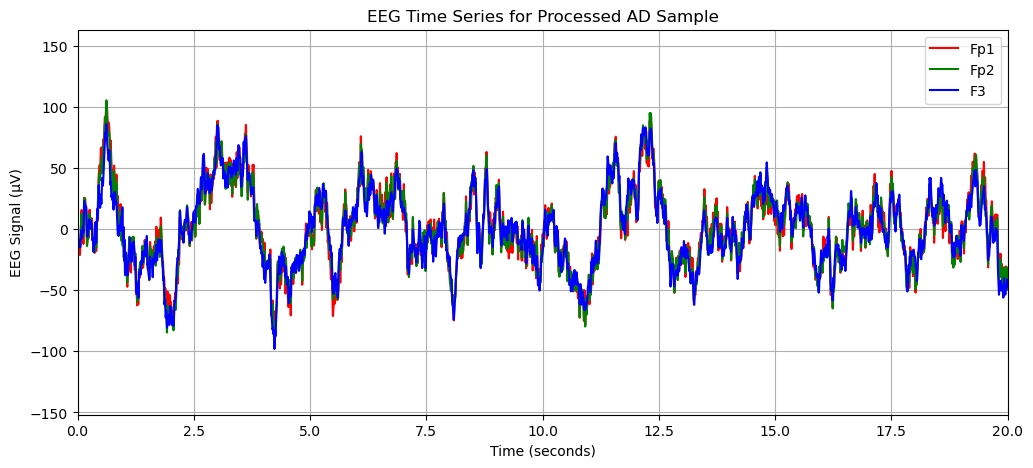

In [19]:
fs = 500  # Sampling rate (Hz)
num_samples = processed_AD.shape[1]  # 10000 samples

time = np.linspace(0, num_samples / fs, num_samples)

channels = ['Fp1', 'Fp2', 'F3']
colors = ['r', 'g', 'b']  # Red, Green, Blue

plt.figure(figsize=(12, 5))
for i in range(3):
    plt.plot(time, processed_AD[i, :], label=channels[i], color=colors[i])

# Formatting
plt.xlim(0,20)
plt.xlabel("Time (seconds)")
plt.ylabel("EEG Signal (µV)")
plt.title("EEG Time Series for Processed AD Sample")
plt.legend()
plt.grid(True)

# Show plot
plt.show()